In [1]:
%pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# importing important modules

from minisom import MiniSom

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve, plot_confusion_matrix

In [3]:
# importing the cleaned dataset
df = pd.read_csv('newDataset.csv')

In [4]:
# the index has become a column as a reult of the upsampling done in the dataset notebook
df.head()

,Unnamed: 0,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,5528,4.0,1.0,1.0,1.0,6.0,15.51,0.40,2.50,6.20,...,2,0,0,0,5.0,1.0,5.0,1.0,1.0,0.0
1,8694,13.0,3.0,1.0,1.0,29.0,123.19,0.08,11.92,10.34,...,8,1,1,0,13.0,6.0,18.0,11.0,5.0,0.0
2,10794,24.0,3.0,1.0,2.0,53.0,236.35,0.10,10.50,22.51,...,19,0,3,0,11.0,11.0,32.0,21.0,5.0,0.0
3,4954,65.0,16.0,1.0,6.0,0.0,0.00,0.00,0.00,0.00,...,0,0,0,0,0.0,0.0,0.0,0.0,31.0,0.0
4,6181,33.0,10.0,1.0,7.0,142.0,739.74,0.03,30.59,24.18,...,26,0,5,0,20.0,17.0,90.0,52.0,19.0,0.0


In [5]:
# dropping it
df = df.drop('Unnamed: 0', axis=1)

In [6]:
# the final dataset
df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,4.0,1.0,1.0,1.0,6.0,15.51,0.40,2.50,6.20,38.77,...,2,0,0,0,5.0,1.0,5.0,1.0,1.0,0.0
1,13.0,3.0,1.0,1.0,29.0,123.19,0.08,11.92,10.34,1468.01,...,8,1,1,0,13.0,6.0,18.0,11.0,5.0,0.0
2,24.0,3.0,1.0,2.0,53.0,236.35,0.10,10.50,22.51,2481.67,...,19,0,3,0,11.0,11.0,32.0,21.0,5.0,0.0
3,65.0,16.0,1.0,6.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0.0,0.0,0.0,0.0,31.0,0.0
4,33.0,10.0,1.0,7.0,142.0,739.74,0.03,30.59,24.18,22627.41,...,26,0,5,0,20.0,17.0,90.0,52.0,19.0,0.0


In [7]:
# splitting the data into features and target
x = df.iloc[:,:-1]
y=df['defects']

In [8]:
# checking the number of samples in each set
X_train, X_test, y_train, y_test = train_test_split(x, y)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 10530 samples.
Testing set has 3510 samples.


In [9]:
# splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y)

#normalizing the data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#y_train = sc.transform(X_test)
#y_test = sc.transform(X_test)

In [10]:
# creating a base model with 100x100 map and triangle neighborhood function and testing its quantizationa and topographic errors
''' som = MiniSom(100, 100, X_train.shape[1], sigma=3., learning_rate=.7, neighborhood_function='gaussian', random_seed=10)

max_iter = 1000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(X_train))
    som.update(X_train[rand_i], som.winner(X_train[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(X_train))
    t_error.append(som.topographic_error(X_train))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('error')
plt.xlabel('iteration index')
plt.legend()
plt.show() '''

" som = MiniSom(100, 100, X_train.shape[1], sigma=3., learning_rate=.7, neighborhood_function='gaussian', random_seed=10)\n\nmax_iter = 1000\nq_error = []\nt_error = []\n\nfor i in range(max_iter):\n    rand_i = np.random.randint(len(X_train))\n    som.update(X_train[rand_i], som.winner(X_train[rand_i]), i, max_iter)\n    q_error.append(som.quantization_error(X_train))\n    t_error.append(som.topographic_error(X_train))\n\nplt.plot(np.arange(max_iter), q_error, label='quantization error')\nplt.plot(np.arange(max_iter), t_error, label='topographic error')\nplt.ylabel('error')\nplt.xlabel('iteration index')\nplt.legend()\nplt.show() "

In [11]:
# function to evaluate the map classifier using different metrics
def evaluate(som, y_test, y_pred):

    acc = accuracy_score(y_test, y_pred)
    perf = precision_recall_fscore_support(y_test, y_pred, average = 'macro')
    print("Accuracy: ", acc)
    print(f"Precision : {perf[0]:.4f} Recall : {perf[1]:.4f} Fscore : {perf[2]:.4f}")

    auc = roc_auc_score(y_pred, y_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)
    plt.legend(loc=4)
    plt.show()

In [12]:
# since this in supervised classification not unsupervised, this function chooses the class of 
# the BMU to be the final class of each instance
def classify(som, data):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    winmap = som.labels_map(X_train, y_train)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result


 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.27300579698582494
Accuracy:  0.7700854700854701
Precision : 0.7732 Recall : 0.7704 Fscore : 0.7696


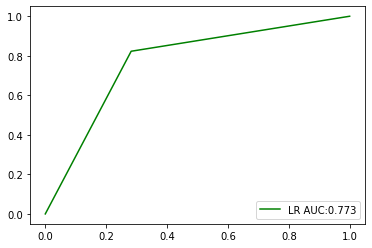

In [13]:
somClassifier = MiniSom(100,100, 21, sigma=3, learning_rate=0.7, neighborhood_function='triangle', random_seed=10)
somClassifier.pca_weights_init(X_train)
somClassifier.train_random(X_train, 10000, verbose=True)

y_pred = classify(somClassifier, X_test)
evaluate(somClassifier, y_test, y_pred)


In [14]:
print('Quantization Error for the classifier with traingle neiborhood is ', somClassifier.quantization_error(X_train))
print('Topographic Error for the classifier with traingle neiborhood is ', somClassifier.topographic_error(X_train))

Quantization Error for the classifier with traingle neiborhood is  0.27300579698582494
Topographic Error for the classifier with traingle neiborhood is  0.2617283950617284


 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.46609752167209745
Accuracy:  0.7643874643874644
Precision : 0.7749 Recall : 0.7649 Fscore : 0.7623


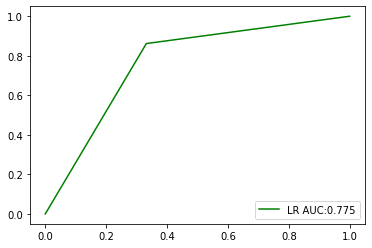

In [16]:
somClassifier2 = MiniSom(100, 100, 21, sigma=3, learning_rate=0.7, neighborhood_function='gaussian', random_seed=10)
somClassifier2.pca_weights_init(X_train)
somClassifier2.train_random(X_train, 10000, verbose=True)

y_pred = classify(somClassifier2, X_test)
evaluate(somClassifier2, y_test, y_pred)

In [17]:
print('Quantization Error for the classifier with gaussian neiborhood is: ', somClassifier2.quantization_error(X_train))
print('Topographic Error or the classifier with gaussian neiborhood is: ', somClassifier2.topographic_error(X_train))

Quantization Error for the classifier with gaussian neiborhood is:  0.46609752167209745
Topographic Error or the classifier with gaussian neiborhood is:  0.050047483380816715
